In [27]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif,chi2

# Read Datasets

In [29]:
#read the train data
df = pd.read_csv("../input/kowope/kowope_train.csv")
df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [30]:

#read the test data
test_df = pd.read_csv("../input/kowope/kowope_test.csv")
test_df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [31]:
#check for missing values
df.isna().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [32]:
#check summary statistics
desc = df.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
form_field1,53471.0,3.491796e+03,1.884624e+02,2990.000000,3.358000e+03,3.484000e+03,3.620000e+03,3.900000e+03
form_field2,52156.0,5.507368e-01,8.209792e-01,0.000000,7.078750e-02,2.675750e-01,7.195125e-01,1.801505e+01
form_field3,55645.0,1.052225e+00,2.147768e+00,0.000000,0.000000e+00,6.200000e-02,1.282000e+00,5.737160e+01
form_field4,55645.0,8.519789e-01,3.157692e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.167220e+01
form_field5,55645.0,1.956317e+00,1.051240e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.077486e+02
form_field6,42640.0,6.244479e+05,1.433422e+06,0.000000,1.400400e+04,1.155330e+05,5.259280e+05,5.313546e+07
form_field7,50837.0,6.865210e+06,1.912729e+07,0.000000,6.869740e+05,2.704328e+06,6.993831e+06,2.158794e+09
form_field8,42640.0,2.626690e+06,3.927355e+06,0.000000,1.929440e+05,9.639420e+05,3.751516e+06,1.037397e+08
form_field9,47992.0,1.316002e+07,1.977963e+07,0.000000,1.368502e+06,5.506295e+06,1.694552e+07,3.200533e+08
form_field10,55645.0,1.185585e+07,2.669459e+07,0.000000,4.500730e+05,3.707559e+06,1.326101e+07,2.191361e+09


In [33]:
#check for percentage missing values
desc["missing %"] = 1 -(desc["count"]/len(df))

high_null_values = desc["missing %"].sort_values(ascending = False)
high_null_values.head()

form_field40    0.780875
form_field31    0.703714
form_field41    0.682661
form_field11    0.561089
form_field45    0.559232
Name: missing %, dtype: float64

Data Preprocessing

In [34]:
#check other data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [35]:
# #fill null values
df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [36]:
#check null for null values
df.isnull().sum()

Applicant_ID      0
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0


In [37]:
#check for duplicates
df.duplicated().sum()

0

In [38]:
#make a copy of the train and test dataset
df_copy = df.copy()
test =test_df.copy()
df_copy.shape,test.shape

((56000, 52), (24000, 51))

In [39]:
# encode the target variable[default_target] in the train set, first import the following libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
#no is 0 and yes 1
df_copy['default_status'] = labelencoder.fit_transform(df_copy['default_status'])
df_copy['default_status'].head()


#encode the categorical variable
labelencoder = LabelEncoder()
df_copy['form_field47'] = labelencoder.fit_transform(df['form_field47'])


#encode the categorical variable in the test data
labelencoder = LabelEncoder()
test['form_field47'] = labelencoder.fit_transform(test['form_field47'])

In [40]:
#split train data into features and Target
X= df_copy.drop(["default_status","Applicant_ID"],axis=1)#drop the columns for application Id and the target
y= df_copy["default_status"]

test = test_df.drop(["Applicant_ID"],axis = 1)

In [41]:
#Distribution of classes
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 42285, One count = 13715


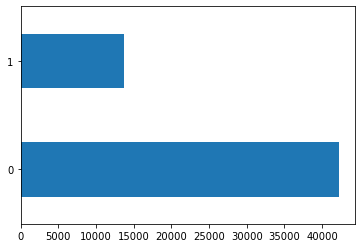

In [42]:
#plot the graph of the classes
df_copy["default_status"].value_counts().plot(kind="barh")

In [43]:
#The relationship between the features and targets using mutual info clasifier
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

form_field1     0.095644
form_field6     0.071986
form_field9     0.069021
form_field8     0.068130
form_field10    0.059220
form_field21    0.058107
form_field42    0.055545
form_field24    0.055148
form_field7     0.055074
form_field32    0.051594
form_field28    0.051035
form_field25    0.048089
form_field3     0.047525
form_field37    0.044094
form_field11    0.039579
form_field2     0.039029
form_field50    0.037349
form_field13    0.036286
form_field26    0.035921
form_field27    0.035380
form_field48    0.032997
form_field47    0.031324
form_field43    0.030517
form_field22    0.029945
form_field29    0.029418
form_field49    0.026625
form_field23    0.024982
form_field14    0.020826
form_field17    0.017131
form_field12    0.016895
form_field4     0.015990
form_field35    0.015058
form_field15    0.014745
form_field44    0.014700
form_field16    0.014351
form_field36    0.013653
form_field5     0.013561
form_field18    0.013519
form_field34    0.012715
form_field40    0.012457


In [44]:
#split data into train and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 63
                                                 ,stratify = y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((44800, 50), (11200, 50), (44800,), (11200,))

In [45]:
#check for f score
f_score = chi2(X_train,y_train)
f_score

(array([1.93606533e+05, 2.99119245e+03, 7.36741946e+03, 1.08409818e+04,
        1.99033368e+04, 4.64579879e+09, 3.45164420e+10, 1.63361997e+10,
        7.46793820e+10, 7.75350200e+10, 6.19913318e+09, 2.83272719e+09,
        3.45976394e+10, 5.51019255e+11, 1.07027921e+11, 2.56553716e+03,
        3.10149636e+03, 3.04872115e+03, 2.59382225e+03, 2.25974755e+03,
        2.13509907e+04, 7.22491149e+06, 7.77192422e+06, 4.97870156e+04,
        4.68688471e+06, 2.26925125e+07, 1.41039797e+07, 9.09342179e+07,
        1.08737527e+07, 2.11569690e+06, 1.47538322e+06, 3.13788587e+06,
        1.47775417e+04, 2.14211786e+03, 2.50839148e+03, 1.15303796e+04,
        2.66698509e+04, 7.54596672e+03, 1.53014724e+03, 1.15049321e+05,
        1.59286620e+02, 2.22932265e+03, 7.44779817e+03, 8.10176993e+01,
        9.03479233e+01, 1.14761261e+03, 1.49815844e+03, 1.24987145e+09,
        3.24378721e+03, 6.21333107e+09]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000

In [46]:
p_values =pd.Series(f_score[1],index= X_train.columns)
p_values.sort_values(ascending = True,inplace = True)
p_values

form_field1      0.000000e+00
form_field26     0.000000e+00
form_field27     0.000000e+00
form_field28     0.000000e+00
form_field29     0.000000e+00
form_field30     0.000000e+00
form_field31     0.000000e+00
form_field32     0.000000e+00
form_field33     0.000000e+00
form_field34     0.000000e+00
form_field35     0.000000e+00
form_field36     0.000000e+00
form_field37     0.000000e+00
form_field38     0.000000e+00
form_field39     0.000000e+00
form_field40     0.000000e+00
form_field42     0.000000e+00
form_field43     0.000000e+00
form_field47     0.000000e+00
form_field48     0.000000e+00
form_field49     0.000000e+00
form_field24     0.000000e+00
form_field25     0.000000e+00
form_field22     0.000000e+00
form_field2      0.000000e+00
form_field3      0.000000e+00
form_field4      0.000000e+00
form_field5      0.000000e+00
form_field6      0.000000e+00
form_field7      0.000000e+00
form_field8      0.000000e+00
form_field23     0.000000e+00
form_field10     0.000000e+00
form_field

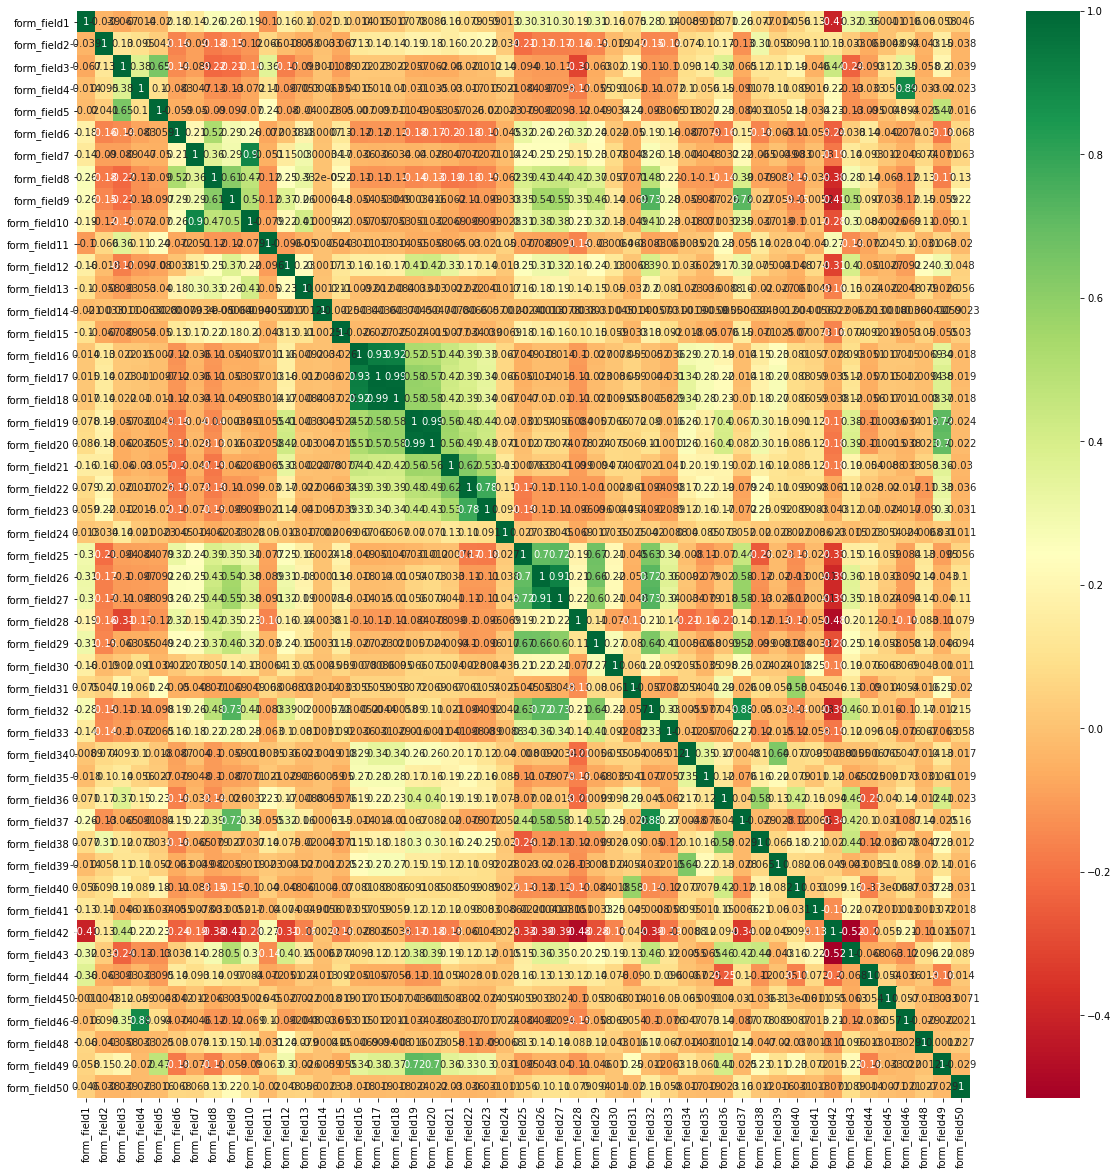

In [47]:
#plot of each features in train dataset
import seaborn as sns

corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g= sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [48]:
threshold = 0.9
# find and remove correlated features using threshold


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr



corr_features = correlation(X_train,0.9)
print(len(set(corr_features)))
corr_features

4


{'form_field17', 'form_field18', 'form_field20', 'form_field27'}

In [49]:
#drop the columns

X_train = X_train.drop(["form_field44","form_field38","form_field5","form_field16","form_field34","form_field18","form_field46","form_field41","form_field45","form_field20","form_field40","form_field34","form_field19","form_field39","form_field30","form_field31","form_field19"],axis = 1)
X_test = X_test.drop(["form_field44","form_field38","form_field5","form_field16","form_field34","form_field18","form_field46","form_field41","form_field45","form_field20","form_field40","form_field34","form_field19","form_field39","form_field30","form_field31","form_field19"],axis = 1)


In [50]:
#check shape
X_train.shape,X_test.shape

((44800, 35), (11200, 35))

In [51]:
#convert encoded categorical variables to categorical variables so we can feed the model for better score
X_train["form_field47"] = df["form_field47"]
X_test["form_field47"] = df["form_field47"]

In [52]:
#Check for any categorical features

cat_features = np.where(X_train.dtypes != float)[0]
print(cat_features)
#and for test set
cat_features = np.where(X_test.dtypes != float)[0]
print(cat_features)
#and for test set


categorical_features = np.where(test.dtypes != float)[0]
print(categorical_features)


[12 31]
[12 31]
[13 46]


In [53]:
#calculate the weight  of the class
from sklearn.utils import class_weight
cw = list(class_weight.compute_class_weight('balanced',np.unique(y),y))
cw

[0.6621733475227622, 2.041560335399198]

In [55]:
from catboost import Pool
from catboost import CatBoostClassifier

#pool initilization
train_pool = Pool(
    data = X_train,
    label =y_train,
    cat_features = cat_features
)

validation_pool = Pool(
    data = X_test,
    label =y_test,
    cat_features = cat_features
)

#for the test set
validation_test = Pool(
data = test,
cat_features = categorical_features)

In [56]:
#create a mdoel instance
from catboost import CatBoostClassifier
model = CatBoostClassifier(eval_metric = "AUC",class_weights= [0.6621733475227622, 2.041560335399198])

In [57]:
#fit model
model.fit(train_pool,eval_set = (validation_pool),verbose = 50,plot= True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.081054
0:	test: 0.7971845	best: 0.7971845 (0)	total: 129ms	remaining: 2m 8s
50:	test: 0.8294628	best: 0.8294628 (50)	total: 3.94s	remaining: 1m 13s
100:	test: 0.8331328	best: 0.8331567 (99)	total: 8.18s	remaining: 1m 12s
150:	test: 0.8351483	best: 0.8351573 (149)	total: 12s	remaining: 1m 7s
200:	test: 0.8355571	best: 0.8356901 (181)	total: 15.3s	remaining: 1m 1s
250:	test: 0.8358791	best: 0.8359387 (218)	total: 19.5s	remaining: 58.1s
300:	test: 0.8360406	best: 0.8360821 (298)	total: 23s	remaining: 53.4s
350:	test: 0.8356409	best: 0.8360821 (298)	total: 26.4s	remaining: 48.8s
400:	test: 0.8354787	best: 0.8360821 (298)	total: 30.2s	remaining: 45.2s
450:	test: 0.8351701	best: 0.8360821 (298)	total: 34s	remaining: 41.4s
500:	test: 0.8345472	best: 0.8360821 (298)	total: 37.5s	remaining: 37.3s
550:	test: 0.8341081	best: 0.8360821 (298)	total: 41.6s	remaining: 33.9s
600:	test: 0.8334397	best: 0.8360821 (298)	total: 45.2s	remaining: 30s
650:	test: 0.8330632	best: 0.83608

In [58]:
# #check the feature importance
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,form_field1,10.516521
1,form_field47,8.879551
2,form_field2,6.875659
3,form_field6,5.052192
4,form_field36,3.057491
5,form_field37,2.944661
6,form_field10,2.892677
7,form_field49,2.853007
8,form_field13,2.836423
9,form_field14,2.829258


In [59]:
#predictions for the validation set
predictions= model.predict(validation_test)
print(predictions)
#predict_proba for the validation set
prediction_proba = model.predict_proba(validation_test)[:,1]
print(prediction_proba)

[1 1 1 ... 1 1 1]
[0.63524168 0.52411232 0.63334021 ... 0.66639441 0.8573232  0.59890793]



Hyper paramater tuning

In [65]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=2500,
    random_seed=42,
    custom_metric=['AUC'],
    loss_function = "Logloss",
    eval_metric = "AUC",
    verbose = 50,
    class_weights= [0.6621733475227622, 2.041560335399198],
    early_stopping_rounds = 50,
#     scale_pos_weight= 0.324,
    depth = 8,
    subsample = 0.5,
    learning_rate = 0.01,
    l2_leaf_reg = 25,
    random_strength = 0.8,
#     sampling_frequency = "PerTreelevel",
    boosting_type = "Plain",
    rsm = 0.2,
    fold_len_multiplier = 4,
    feature_border_type = "GreedyLogSum",
    nan_mode = "Max",
    bootstrap_type='Bernoulli',
    leaf_estimation_method = "Newton"
        
)

In [66]:
model.fit(train_pool,eval_set = (validation_pool),verbose = 50,plot= True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7770385	best: 0.7770385 (0)	total: 55.3ms	remaining: 2m 18s
50:	test: 0.8187023	best: 0.8187023 (50)	total: 3.82s	remaining: 3m 3s
100:	test: 0.8215567	best: 0.8216159 (98)	total: 6.79s	remaining: 2m 41s
150:	test: 0.8241680	best: 0.8241680 (150)	total: 9.69s	remaining: 2m 30s
200:	test: 0.8256198	best: 0.8256198 (200)	total: 12.4s	remaining: 2m 21s
250:	test: 0.8270135	best: 0.8270135 (249)	total: 15.7s	remaining: 2m 20s
300:	test: 0.8281001	best: 0.8281001 (300)	total: 18.7s	remaining: 2m 16s
350:	test: 0.8292048	best: 0.8292048 (350)	total: 21.5s	remaining: 2m 11s
400:	test: 0.8300234	best: 0.8300234 (400)	total: 24.4s	remaining: 2m 7s
450:	test: 0.8305272	best: 0.8305272 (450)	total: 27.6s	remaining: 2m 5s
500:	test: 0.8309720	best: 0.8309720 (500)	total: 30.4s	remaining: 2m 1s
550:	test: 0.8314648	best: 0.8314648 (550)	total: 33.2s	remaining: 1m 57s
600:	test: 0.8318998	best: 0.8318998 (600)	total: 36.8s	remaining: 1m 56s
650:	test: 0.8322854	best: 0.8322854 (650)	total

In [67]:
#predictions for the validation set
predictions= model.predict(validation_test)
print(predictions)
#predict_proba for the validation set
prediction_proba = model.predict_proba(validation_test)[:,1]
print(prediction_proba)

[1 0 1 ... 1 1 1]
[0.60602259 0.48260607 0.66922061 ... 0.57886631 0.86159002 0.5054037 ]


In [68]:
#submission using predict_proba
submission = pd.DataFrame(prediction_proba,test_df['Applicant_ID'])
submission.to_csv("submission_file.csv")